# P1: MLE for uniform distribution

1) The distribution of scores of students who got an A+ in Prof. K's class is-
        [92.5,95.8,91.3,94.1,90.9]. Let's first sort the score distribution in ascending order-

In [2]:
scores=sorted([92.5,95.8,91.3,94.1,90.9])
print('Sorted scores',scores)


Sorted scores [90.9, 91.3, 92.5, 94.1, 95.8]


2) If we assume that these scores follow a uniform probability distribution in which every value between an interval from 'a' to 'b' is equally likely, then the probability of observing a value between x1 and x2 within the interval (a,b) can be expresses as-

    p(x1<X<=x2)=(x2-x1)/(b-a).  .......eq(1)


To increase the above probability/likelihood we can tinker with the parameters of the probability distribution, i.e., a,b. Intuitively, if the difference b-a is minimum, then the likelihood expressed in eq(1) will be maximum. So, from the given distribution of scores-

[90.9, 91.3, 92.5, 94.1, 95.8]

the difference b-a is minimum when b=max(scores), a=min(scores).
the minimum value of b should be 95.8, and the maximum value of a is 90.9.

<b>Note-</b>
We cannot choose values for 'a' and 'b' within the maximum and minimum score, since we want to maximize the likelhood of all the observations. 

<b>Analytical approach-</b>

For a uniform distribution, the likelihood of obersving all the samples can be written as:

From i=1....n(number of samples), product(f(xi;a,b))=1/(b-a)^n  (Assuming the samples are independent from each other).

log-likelihood (Reason- eases the differentiation and log is a montonically increasing function)-
log(product(f(xi;a,b)))=-nlog((b-a)).....eq(2)

To maximize equation 2, we differentitate eq(2) with respect to parameter a, b:

d(log(product(f(xi;a,b))))/d(a)= n/(b-a) .......eq(3)

d(log(product(f(xi;a,b))))/d(b)= -n/(b-a) ...........eq(4)


Since the derivative with respect to 'a' equation 3 is monotonically increasing w.r.t a, and the derivative with respect to 'b' equation 4 is monotonically decreasing w.r.t b,

a=min(s1,s2,s3,s4,s5)

b=max(s1,s2,s3,s4,s5), where si= ith student score.







3) Assuming that professor would have used some reasonable numbers like integers multiples of 5 to choose a boundary for A+ students and the maximum score= 100, I believe that a=90 and b=100 is the boundary for A+ grade in the ground-truth distribution. Above we have observed that with a=90.9 and b=95.8, we obtain the maximum likelihood of observing the data samples- assuming they follow an uniform distribution. Now since, 90.9 and 95.8 are not multiples of 5, the closest multiple of 5 less than 90.9 is 90, and the closest multiple of 5 greater than 95.8 is 100. So, 90, 100 seems like the ideal boundary given these constraints- although it reduces the likelihood of observing the samples slightly, it's still better than other options.

<b>Note-</b> We cannot take a>90.9 and b<95.8, as we want to increase the likelihood of observing all the samples and 90.9 and 95.8 are two samples in the given score distribution. And if we choose a multiple of 5<90 for 'a', or a muliple of 5 greater than 100 for 'b', we still reduce the likelihood of observing the samples, as we are increasing the range. For example, if a=85, b=100 as opposed to a=90 and b=100, the likelihood of observing the input samples within range 91,92, assuming uniform distribution would be 1/15 when a=85,b=100, as opposed to 1/10 when a=90 and b=100. So, 90 and 100 seems like the best choice of parameters.

# P2: Central Limit Theorem [3 points]

In [68]:
from matplotlib import pyplot as plt

# P2- 3) 
a) Load the input images

In [69]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img1 = mpimg.imread('luddy1.jpeg') 
img2=  mpimg.imread('luddy2.jpeg')
img3 = mpimg.imread('luddy3.jpeg') 





Shape of Luddy 1- (768, 1024, 3)


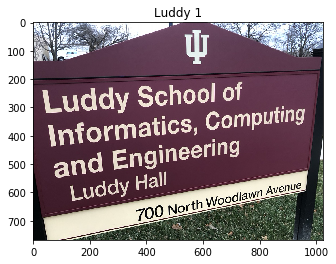

In [70]:
print('Shape of Luddy 1-',img1.shape)
plt.imshow(img1);
plt.title('Luddy 1');

Shape of Luddy 2- (768, 1024, 3)


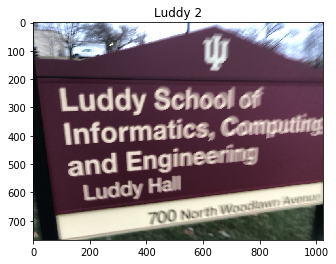

In [71]:
print('Shape of Luddy 2-',img2.shape)

plt.imshow(img2); 
plt.title('Luddy 2');

Shape of Luddy 3- (768, 1024, 3)


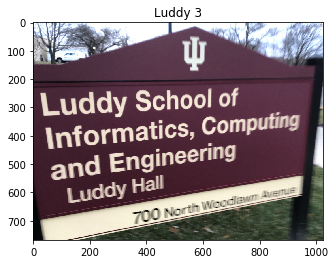

In [72]:
print('Shape of Luddy 3-',img3.shape)

plt.imshow(img3); 
plt.title('Luddy 3');

b) Vectorize all the input images by flattening them into a 2,359,296 vector.

In [73]:
import numpy as np

# Flatten each image
img1_vector=img1.flatten()
img2_vector=img2.flatten()
img3_vector=img3.flatten()


print(img1_vector.shape)
print(img2_vector.shape)
print(img3_vector.shape)


(2359296,)
(2359296,)
(2359296,)


# P2-
4) Plot a histogram to check whether the distribution of pixel intensities in the flattened image is gaussian.

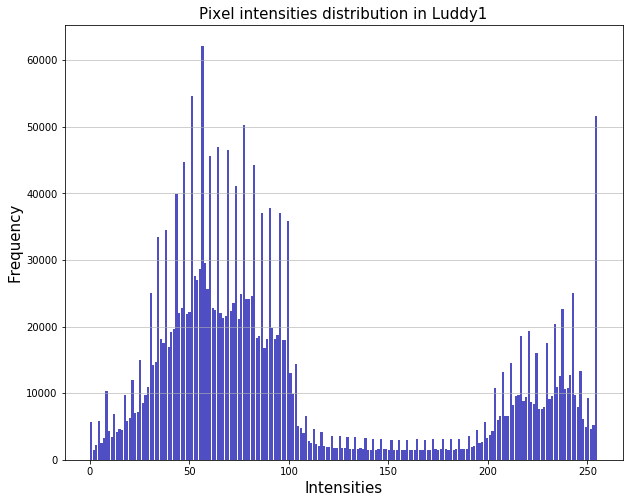

In [74]:
def plot_histogram(image,num):
    plt.figure(figsize=[10,8])
    plt.hist(x=image, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Intensities',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Pixel intensities distribution in Luddy%g' %num,fontsize=15)
    plt.show()
    
plot_histogram(img1_vector,1)

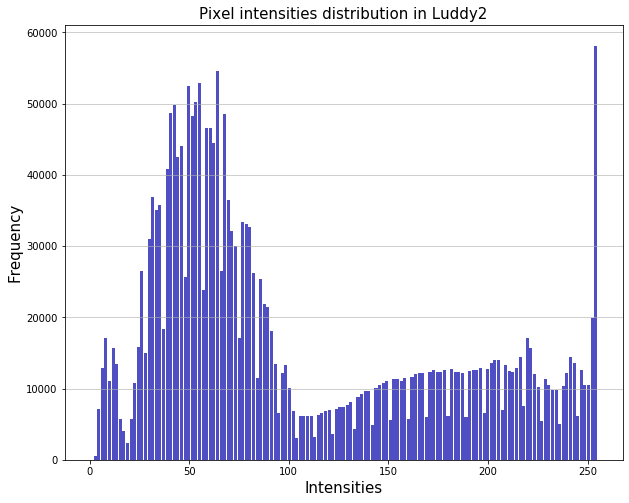

In [75]:
plot_histogram(img2_vector,2)

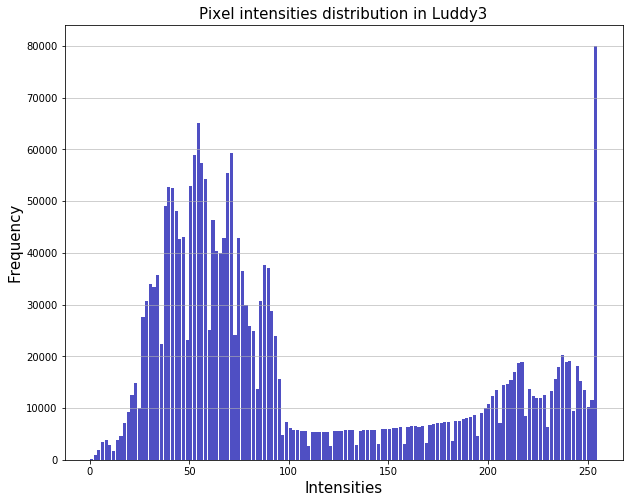

In [76]:
plot_histogram(img3_vector,3)

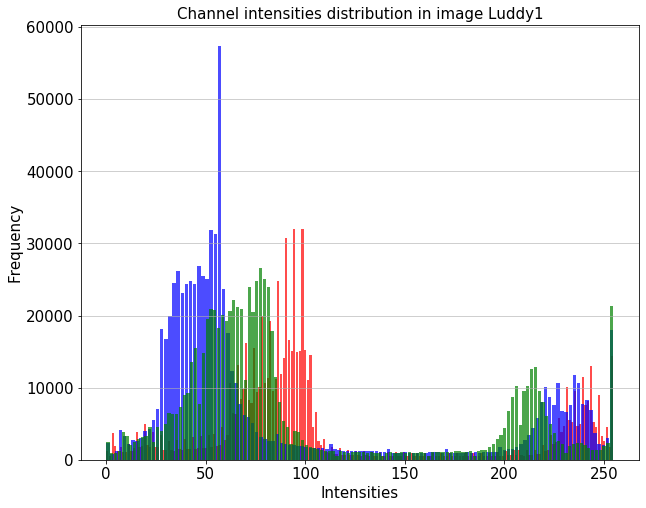

In [77]:
def rgb_dist(image,num):
    red_int=image[:,:,0].flatten()
    blu_int=image[:,:,1].flatten()
    green_int=image[:,:,2].flatten()
    plt.figure(figsize=[10,8])
    plt.hist(x=red_int, bins='auto', color='red',alpha=0.7, rwidth=0.85)
    plt.hist(x=blu_int, bins='auto', color='blue',alpha=0.7, rwidth=0.85)
    plt.hist(x=green_int, bins='auto', color='green',alpha=0.7, rwidth=0.85)

    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Intensities',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Channel intensities distribution in image Luddy%g'%num,fontsize=15)
    plt.show()

rgb_dist(img1,1)

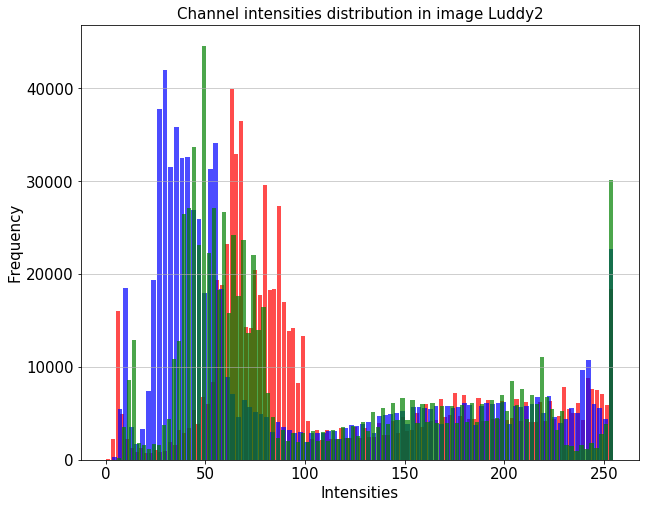

In [78]:
rgb_dist(img2,2)

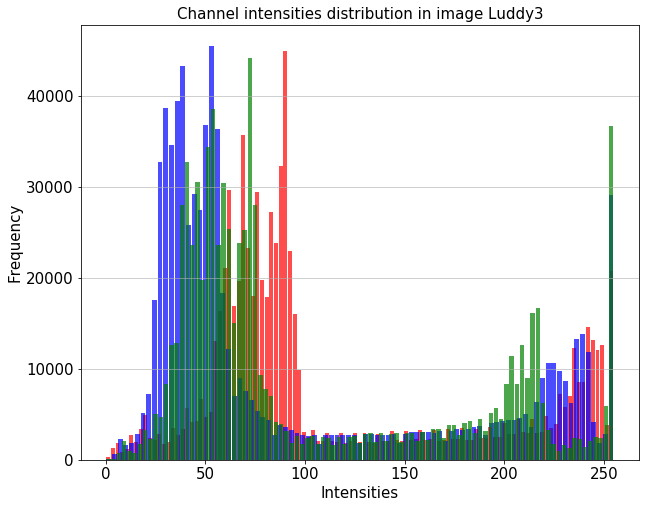

In [79]:
rgb_dist(img3,3)

<b>Note:</b>
From the above histograms, we can observe that the distribution of intensities of pixels in neither of images(flattened or unflattened) is gaussian.

# P2- 6) 
Analytical way to check gaussianity-
Check the gaussianity of the input images using a non-gaussianity metric, called "Kurtosis". Higher value of kurtosis co-efficient corresponds to lower gaussianity in an image.

In [80]:
def cal_kurtosis_metric(image_vector):
    mean=np.mean(image_vector)
    sd=np.std(image_vector)
    image_vector=(image_vector-mean)/sd #standardize the flattened image vector.
    probability=1/len(image_vector)
    sample_sum=0
    for i in image_vector:
        sample_sum+=i**4
    expected_value=probability*sample_sum
    k_measure=expected_value-3
    
    return k_measure

print("Kurtosis metric of luddy1",cal_kurtosis_metric(img1_vector))
print("Kurtosis metric of luddy2",cal_kurtosis_metric(img2_vector))
print("Kurtosis metric of luddy3",cal_kurtosis_metric(img3_vector))
    

Kurtosis metric of luddy1 -0.5594396228435978
Kurtosis metric of luddy2 -0.9183061116458746
Kurtosis metric of luddy3 -0.8406916696650724


From the kurtosis values computed above, we can deduce that the image luddy 1 has the least gaussianity, and hence is sharpest among the three images, while the image luddy 2 is the most gaussian like since it has a lower kurtosis(non-gaussianity) value. So, luddy 2 is the most blurry image among these three images.   

# Graphical way to check gaussianity

<b>Central Limit Theorem</b>

Central Limit Theorem: Sum of independent identically distributed random variable gets closer to a gaussian distribution.

The image with noise or blurriness would be more gaussian like since the blurriness can be considered a sum of two or random variables (scences).

So, let's check graphically whether we can fliter our least sharp image using Central Limit Theorem.


Generate twenty thousand samples where each sample is the mean of intensities of 300 pixels in the flattened image. Plot the resulting distribution in the samples and check which image has the most gaussian like distribution.


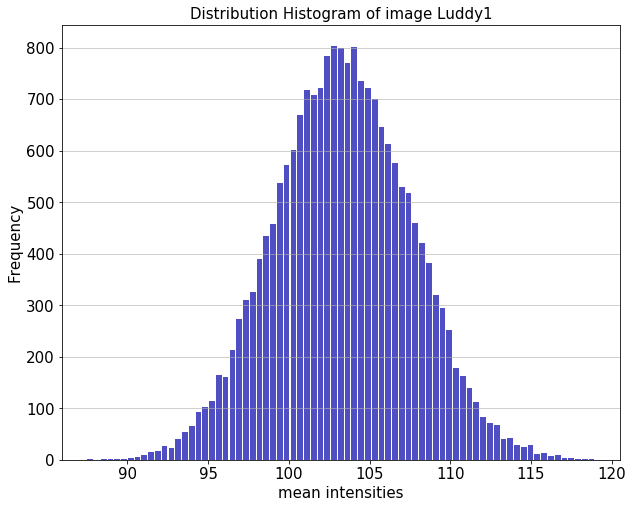

In [84]:
def clt_dist(img_vector,num):
    iid_samples=[]
    for i in range(20000):
        iid_samples.append(np.mean(np.random.choice(img_vector,300)))
    
    plt.figure(figsize=[10,8])
    n, bins, patches = plt.hist(x=iid_samples, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('mean intensities',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.title('Distribution Histogram of image Luddy%g'%num,fontsize=15)
    plt.show()

clt_dist(img1_vector,1)

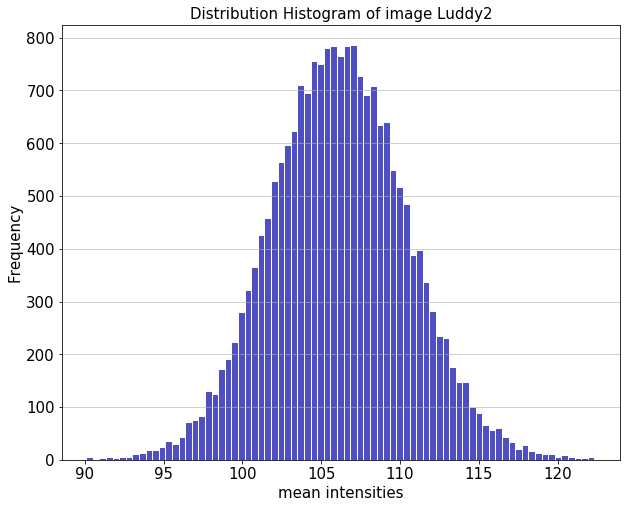

In [85]:
clt_dist(img2_vector,2)

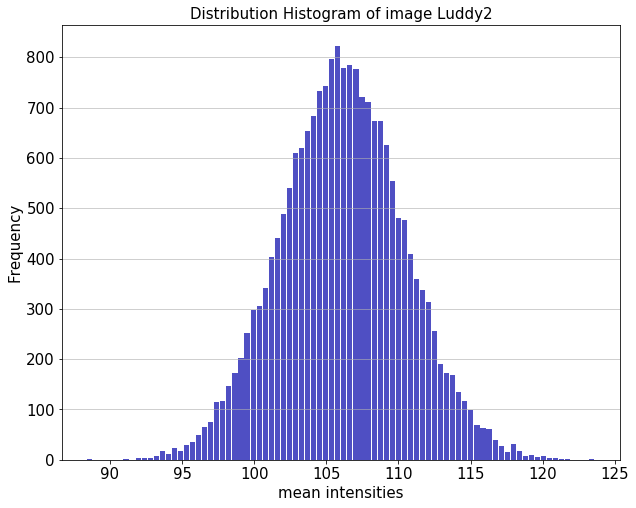

In [86]:
clt_dist(img3_vector,2)

From the figures above we can see that the first image is the least guassian. So, the graphical method produces the same result as the analytical method.

# P3: Gradient Ascent for Eigendecomposition [5 points]

# P3- 1) Load the data from X.mat using loadmat module of scipy.io.

In [141]:
from scipy.io import loadmat
annots = loadmat('X.mat')

In [142]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [143]:
annots['X']

array([[-0.80270267,  0.14826696, -0.73008652, ..., -0.38844022,
        -0.04152344,  1.95023934],
       [ 1.51626395,  1.03244736, -0.45484151, ...,  1.26987396,
         0.45179885, -0.77529334]])

In [144]:
annots['X'].shape

(2, 1000)

# Create a copy of the data

In [145]:
import numpy as np
data_dup=np.array(annots['X']) #Created a copy of the data

# P3-3) Scatter Plot to view the input distribution

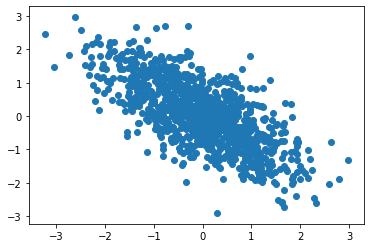

In [146]:
import matplotlib.pyplot as plt

plt.scatter(annots['X'][0],annots['X'][1]);

# P3-4) Initialized the elements of the first eigen vector, using samples from a standard normal distribution.

In [147]:
import numpy as np
mu,sigma=0,1
first_eigen_vector=np.random.normal(mu,sigma,(2,1))
first_eigen_vector/=np.linalg.norm(first_eigen_vector)
print(first_eigen_vector)
print(np.linalg.norm(first_eigen_vector))

[[ 0.21714083]
 [-0.97614029]]
0.9999999999999999


# P3-6) Projected the data samples on the randomly intialized eigen vector

In [148]:
z=(first_eigen_vector.T).dot(annots['X'])
z

array([[-1.65438585e+00, -9.75618648e-01,  2.85457532e-01,
         9.32902039e-01, -8.81217728e-01, -3.51716393e-02,
        -8.70179759e-01, -1.15006328e+00, -1.06203557e+00,
        -1.37561696e+00,  4.83090013e-01,  1.25287831e+00,
        -6.67420959e-01,  4.86604186e-01,  5.29186389e-01,
         1.07603369e+00, -3.51829776e-01, -6.51379582e-01,
         6.22384095e-02, -7.32163644e-01,  6.70593957e-01,
         2.25473156e-01, -1.12719577e+00, -1.61727221e+00,
        -6.36761395e-02,  6.96408986e-01, -2.28875395e-01,
         4.83211523e-01, -3.91520123e-01,  1.52022240e+00,
         1.36933609e+00, -2.58764212e+00,  8.02810920e-01,
         1.66363549e-01,  8.75006236e-01,  1.58706746e+00,
        -1.94098196e+00, -3.40145481e-01, -1.59018433e+00,
        -2.55913984e+00, -4.61933189e-01, -1.26946463e+00,
        -1.11237677e+00, -2.29536077e+00, -6.49121844e-01,
        -1.35848792e-01,  3.82477776e-01, -2.24447820e-01,
         2.35848322e-01,  7.10691042e-01, -2.82491782e-0

z=(first eigen vector.T)(data matrix)

# P3- (6-10) Calculate the first eigen/basis vector using gradient ascent.

By definition,

first eigen value=(first eigen vector.T)(data)(data.T)(first eigen vector)=(z)(z.T)

Since we want the first eigen vector, which has the largest eigenvalue, our optimization goal is to maximize the above equation.


Differentiating the above equation with respect to first_eigen_vector, we get-

gradient(first eigen value)=2*(data)(data.T)(first eigen vector)


In [149]:
prev_gradients=np.zeros((2,1))
gradients=np.ones((2,1))
learning_rate=0.01 #Learning Rate
count=1
while not all(gradients==prev_gradients): #Stop the optimization process when the gradients stop updating. 
    print('Epoch',count)
    prev_gradients=gradients
    projections=(first_eigen_vector.T).dot(annots['X']) #Projecting the data samples on the eigen vector.
    gradients=2*(annots['X'].dot(annots['X'].T)).dot(first_eigen_vector) #Calculating the gradient using matrix differentiation.
    first_eigen_vector+=learning_rate*gradients #Updating the parameters, i.e., elements of the eigen vector using gradients.
    first_eigen_vector/=np.linalg.norm(first_eigen_vector)
    count+=1

print('First Eigen Vector',first_eigen_vector)


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
First Eigen Vector [[ 0.70593278]
 [-0.70827884]]


In [150]:
first_eigen_vector

array([[ 0.70593278],
       [-0.70827884]])

# P3-12 Removing the contribution of first eigen vector from the input data matrix

i) Calculate the first singular value using Singular Value Decomposition (SVD).

From SVD,

X(data_matrix)=v1.s1.u1.T+v2.s2.u2.T+v3.s3.u3.T+.......+vd.sd.ud.T

Where,
v1,v2,....vd= Eigen/ Left singular vectors.
u1,u2......ud=Right singular vectors.

s1=(v1.T)(X)

In [151]:
first_singular_value=np.linalg.norm((first_eigen_vector.T).dot(annots['X']))
first_singular_value

40.72576985464109

ii) Calculate the first right singular vector u1, using SVD.

u1=(X.T)(v1)/s1

In [152]:
first_r_sing_vector=(annots['X'].T).dot(first_eigen_vector)/first_singular_value
print(first_r_sing_vector.shape)
first_r_sing_vector

(1000, 1)


array([[-4.02838743e-02],
       [-1.53856908e-02],
       [-4.74484311e-03],
       [ 1.34269196e-02],
       [-9.08449804e-03],
       [-1.15136390e-03],
       [-3.43459153e-02],
       [-3.68874741e-02],
       [-2.83218054e-02],
       [-3.64630617e-02],
       [ 1.10152053e-02],
       [ 3.06257459e-02],
       [-1.94166693e-02],
       [ 1.99841549e-02],
       [ 1.80540287e-02],
       [ 3.12570817e-02],
       [-1.18042748e-02],
       [-4.02531013e-02],
       [ 8.62426636e-03],
       [-1.50266171e-02],
       [ 1.98919327e-02],
       [ 1.85751173e-03],
       [-3.08625710e-02],
       [-3.73490156e-02],
       [-1.30109760e-03],
       [ 1.93314515e-02],
       [-3.62002780e-05],
       [ 1.90294892e-02],
       [-8.46893488e-03],
       [ 5.31862219e-02],
       [ 2.89483908e-02],
       [-7.16089448e-02],
       [-1.11435788e-03],
       [-1.53234123e-02],
       [ 1.79531213e-02],
       [ 5.01763126e-02],
       [-6.56227089e-02],
       [-8.68806030e-03],
       [-4.3

iii) Calculate the effect of the first eigen vector.

Effect of first eigen vector( from SVD)= (v1)(s1)(u1).

In [153]:
effect_f_singular_vector=(first_eigen_vector.dot(first_r_sing_vector.T)).dot(first_singular_value)
effect_f_singular_vector.shape

(2, 1000)

iv) Remove the effect of first eigen vector (or equivalently he first singular vector) from the input data matrix.
X-v1.s1.u1=v2.s2.u2+......vd.sd.ud.

By doing this, the remnant data matrix will have the second eigen vector of the original data matrix as its primary or first eigen vector. We can now repeat the optimization process in P3(6-10) to obtain the first eigen vector of the remnant matrix( which in turn would be the second eigen vector of the orignal matrix).

In [154]:
data=annots['X']
print(data)
data-=effect_f_singular_vector
print('after subtracting first singular vector influence',data)

[[-0.80270267  0.14826696 -0.73008652 ... -0.38844022 -0.04152344
   1.95023934]
 [ 1.51626395  1.03244736 -0.45484151 ...  1.26987396  0.45179885
  -0.77529334]]
after subtracting first singular vector influence [[ 0.35544485  0.59060028 -0.59367391 ...  0.44006899  0.20506758
   0.59071041]
 [ 0.3542675   0.58864401 -0.59170746 ...  0.43861133  0.20438832
   0.58875378]]


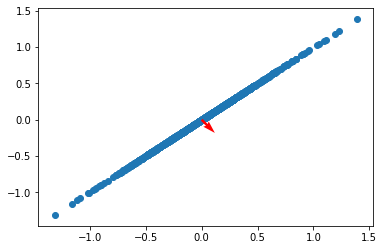

In [155]:
import matplotlib.pyplot as plt
origin = [0], [0] # origin point

plt.scatter(data[0],data[1]);

plt.quiver(*origin, first_eigen_vector[0],first_eigen_vector[1], color=['r']);

From the above plot, we can clearly see that after subtracting the effect/contribution of first eigen vector, we don't see any variation along the first eigen vector.

# P3- 13) Calculating the second eigen vector using gradient ascent.

i) First randomly initialize the elements of the second eigen vector, using samples from a standard normal distribution.

In [156]:
import numpy as np
mu,sigma=0,1
second_eigen_vector=np.random.normal(mu,sigma,(2,1))
second_eigen_vector/=np.linalg.norm(second_eigen_vector)

print(second_eigen_vector)
print(np.linalg.norm(second_eigen_vector))

[[-0.63156629]
 [ 0.77532188]]
0.9999999999999999


ii) We calculate the first eigen vector the remaining data.

second eigen value=(second eigen vector.T)(remaining_data)(remaining_data.T)(second eigen vector)=(z)(z.T)

Since we want the first eigen vector, which has the largest eigenvalue, our optimization goal is to maximize the above equation.


Differentiating the above equation with respect to first_eigen_vector, we get-

gradient(second eigen value)=2*(remaining data)(remaining data.T)(second eigen vector)

In [157]:
prev_gradients=np.zeros((2,1))
gradients=np.ones((2,1))
learning_rate=0.01
count=1
while not all(gradients==prev_gradients):
    print('Epoch',count)
    prev_gradients=gradients
    projections=(second_eigen_vector.T).dot(data)
    gradients=2*(data.dot(data.T)).dot(second_eigen_vector)
    second_eigen_vector+=learning_rate*gradients
    second_eigen_vector/=np.linalg.norm(second_eigen_vector)
    count+=1
print('Second Eigen Vector',second_eigen_vector)


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Second Eigen Vector [[0.70827884]
 [0.70593278]]


In [158]:
second_eigen_vector

array([[0.70827884],
       [0.70593278]])

iii) Calculate the second singular value using the equation below- 

s2=(v2.T)(X) (From SVD)

In [159]:
second_singular_value=np.linalg.norm((second_eigen_vector.T).dot(data))
second_singular_value

17.040911224746996

# P3- 14) Overlaying the eigen vectors on input data. 

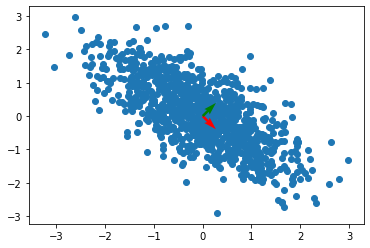

In [160]:
import matplotlib.pyplot as plt

plt.scatter(data_dup[0],data_dup[1]);
origin = [0], [0] # origin point

eigen_vectors=np.array([[ first_eigen_vector[0],
       first_eigen_vector[1]],[second_eigen_vector[0],
       second_eigen_vector[1]]])
plt.quiver(*origin, eigen_vectors[:,0], eigen_vectors[:,1], color=['r','g']);

# P4: Eigenvectors for Two-Notes [4 points]

# P4- 1) 
    a) Load the flute.mat file which is a matrix representation of two musical notes played by a flute.

In [161]:
from scipy.io import loadmat
data = loadmat('flute.mat')

In [162]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [163]:
data['X']

array([[2.22044605e-16, 2.22044605e-16, 3.99510508e-07, ...,
        1.42589489e-04, 6.87267098e-05, 1.13785909e-06],
       [2.22044605e-16, 2.22044605e-16, 3.95122614e-07, ...,
        7.24402691e-05, 5.77260576e-05, 1.06510435e-06],
       [2.22044605e-16, 2.22044605e-16, 3.91923962e-07, ...,
        7.71021447e-05, 4.90908349e-05, 9.87485936e-07],
       ...,
       [2.22044605e-16, 2.22044605e-16, 4.44359827e-07, ...,
        3.44833153e-04, 2.19195967e-04, 5.28925374e-07],
       [2.22044605e-16, 2.22044605e-16, 4.38474029e-07, ...,
        9.01989270e-04, 2.62043280e-04, 3.80873503e-07],
       [2.22044605e-16, 2.22044605e-16, 4.36490255e-07, ...,
        1.19451286e-03, 2.78572697e-04, 3.16975075e-07]])

In [164]:
data['X'].shape

(128, 143)

In [165]:
flute_samples=data['X']

# P4- 1) 
    b) Plot the input data matrix using a colormap.

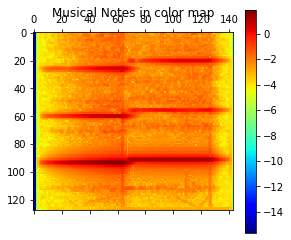

In [203]:
import matplotlib.pyplot as plt
import numpy as np
plt.matshow(np.log10(1e-30 + flute_samples),cmap='jet'); #Reference: Piazza discussion.
#plt.matshow(flute_samples,cmap='jet')
plt.colorbar();
plt.title('Musical Notes in color map');

# P4- 2)
 a) Compute two eigen vectors for the input data matrix. 

i) Initialized the elements of the first eigen vector, using samples from a standard normal distribution.

In [168]:
import numpy as np
mu,sigma=0,1
first_eigen_vector=np.random.normal(mu,sigma,(128,1))
first_eigen_vector/=np.linalg.norm(first_eigen_vector)
print(first_eigen_vector)
print(np.linalg.norm(first_eigen_vector))

[[-0.18562931]
 [-0.01458898]
 [ 0.04880467]
 [ 0.04032264]
 [ 0.0084231 ]
 [ 0.12827206]
 [ 0.02038756]
 [-0.0817751 ]
 [-0.07278545]
 [ 0.00072144]
 [ 0.14209969]
 [-0.00211595]
 [-0.1220685 ]
 [ 0.11305649]
 [-0.16945639]
 [-0.08674043]
 [-0.06223212]
 [ 0.07541975]
 [-0.05036149]
 [ 0.11546016]
 [-0.15113974]
 [-0.14178993]
 [-0.01093331]
 [-0.03875944]
 [ 0.13792275]
 [-0.06136543]
 [ 0.02537292]
 [-0.06607503]
 [-0.01075217]
 [ 0.07987271]
 [-0.0124655 ]
 [-0.00597214]
 [-0.10304043]
 [ 0.21149596]
 [-0.03572272]
 [-0.03716721]
 [ 0.14465958]
 [ 0.09598805]
 [-0.06757597]
 [ 0.12312137]
 [ 0.01073034]
 [ 0.0606546 ]
 [-0.07969684]
 [ 0.11540602]
 [ 0.02177197]
 [ 0.01971078]
 [ 0.00717476]
 [-0.07328622]
 [-0.00794184]
 [ 0.14118316]
 [-0.00281159]
 [ 0.00421271]
 [ 0.13057077]
 [-0.14130412]
 [ 0.08629538]
 [-0.0510517 ]
 [ 0.01210657]
 [ 0.1284234 ]
 [-0.11363314]
 [ 0.09143932]
 [ 0.03843524]
 [ 0.01969096]
 [ 0.04695835]
 [-0.0634775 ]
 [-0.04419618]
 [-0.10120689]
 [-0.04040

ii) Compute the first eigen vector using gradient ascent.

By definition,

first eigen value=(first eigen vector.T)(data)(data.T)(first eigen vector).

Since we want the first eigen vector, which has the largest eigenvalue, our optimization goal is to maximize the above equation.


Differentiating the above equation with respect to first_eigen_vector, we get-

gradient(first eigen value)=2*(data)(data.T)(first eigen vector)

In [169]:
prev_gradients=np.zeros((128,1))
gradients=np.ones((128,1))
learning_rate=0.01
count=1
while not all(gradients-prev_gradients<1e-10):
    print('Epoch',count)
    prev_gradients=gradients
    projections=(first_eigen_vector.T).dot(flute_samples)
    gradients=2*(flute_samples.dot(flute_samples.T)).dot(first_eigen_vector)
    first_eigen_vector+=learning_rate*gradients
    first_eigen_vector/=np.linalg.norm(first_eigen_vector)
    count+=1
    
print('First eigen vector',first_eigen_vector)


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
First eigen vector [[3.00636715e-04]
 [2.67798475e-04]
 [2.93900098e-04]
 [2.55952558e-04]
 [3.12011223e-04]
 [2.97901089e-04]
 [2.71826491e-04]
 [2.18781139e-04]
 [1.81775516e-04]
 [2.05989313e-04]
 [1.87850111e-04]
 [2.46493896e-04]
 [2.76832690e-04]
 [2.18336906e-04]
 [2.50780652e-04]
 [3.39347465e-04]
 [2.74600092e-04]
 [2.90545792e-04]
 [3.94999157e-04]
 [7.07644475e-04]
 [3.86619192e-03]
 [4.71342987e-03]
 [1.56908880e-03]
 [5.53584993e-04]
 [1.40635520e-03]
 [9.95326665e-03]
 [4.41110575e-02]
 [4.26161925e-02]
 [8.57852491e-03]
 [1.29129646e-03]
 [4.14580337e-04]
 [3.01986495e-04]
 [2.09258258e-04]
 [2.13341682e-04]
 [2.16880322e-04]
 [1.80448213e-04]
 [1.45016080e-04]
 [1.97291647e-04]
 [2.13702271e-04]
 [1.30428296e-04]
 [1.13493039e-04]
 [1.40359024e-04]
 [1.23157189e-04]


Above we got the first eigen vector in 27 epochs.

In [170]:
first_eigen_vector

array([[3.00636715e-04],
       [2.67798475e-04],
       [2.93900098e-04],
       [2.55952558e-04],
       [3.12011223e-04],
       [2.97901089e-04],
       [2.71826491e-04],
       [2.18781139e-04],
       [1.81775516e-04],
       [2.05989313e-04],
       [1.87850111e-04],
       [2.46493896e-04],
       [2.76832690e-04],
       [2.18336906e-04],
       [2.50780652e-04],
       [3.39347465e-04],
       [2.74600092e-04],
       [2.90545792e-04],
       [3.94999157e-04],
       [7.07644475e-04],
       [3.86619192e-03],
       [4.71342987e-03],
       [1.56908880e-03],
       [5.53584993e-04],
       [1.40635520e-03],
       [9.95326665e-03],
       [4.41110575e-02],
       [4.26161925e-02],
       [8.57852491e-03],
       [1.29129646e-03],
       [4.14580337e-04],
       [3.01986495e-04],
       [2.09258258e-04],
       [2.13341682e-04],
       [2.16880322e-04],
       [1.80448213e-04],
       [1.45016080e-04],
       [1.97291647e-04],
       [2.13702271e-04],
       [1.30428296e-04],


iii) Calculate the first singular value (s1) using SVD.

s1=(v1.t).(X), where X is the input data matrix, and v1 is the first eigen vector.

In [171]:
first_singular_value=np.linalg.norm((first_eigen_vector.T).dot(flute_samples))
first_singular_value

434.34488635344826

iv) Calculate the first right singular vector (u1) using equations from SVD.

u1=(X.T).(v1)/s1

In [172]:
first_r_sing_vector=(flute_samples.T).dot(first_eigen_vector)/first_singular_value
print(first_r_sing_vector.shape)
first_r_sing_vector

(143, 1)


array([[1.12646497e-18],
       [1.12646497e-18],
       [4.50829051e-09],
       [2.80478151e-06],
       [2.56633110e-05],
       [9.79537693e-05],
       [2.50539847e-04],
       [5.02434784e-04],
       [8.39950543e-04],
       [1.23293468e-03],
       [1.66414698e-03],
       [2.13728997e-03],
       [2.67590496e-03],
       [3.29567823e-03],
       [4.01837753e-03],
       [4.86610275e-03],
       [5.85262744e-03],
       [6.98405075e-03],
       [8.24068787e-03],
       [9.64172117e-03],
       [1.12249882e-02],
       [1.29746344e-02],
       [1.48843130e-02],
       [1.69841751e-02],
       [1.92582654e-02],
       [2.17093204e-02],
       [2.43402283e-02],
       [2.71226488e-02],
       [3.00157084e-02],
       [3.30974242e-02],
       [3.63703102e-02],
       [3.98869897e-02],
       [4.37202034e-02],
       [4.78547862e-02],
       [5.23951087e-02],
       [5.72804104e-02],
       [6.24365842e-02],
       [6.78223756e-02],
       [7.34043683e-02],
       [7.90969779e-02],


v) Calculate the contribution of first singular vector in the input data matrix.

In [173]:
effect_f_singular_vector=(first_eigen_vector.dot(first_r_sing_vector.T)).dot(first_singular_value)
effect_f_singular_vector.shape


(128, 143)

vi) Create another instance of the input data matrix.

In [174]:
data_dup=np.array(flute_samples)
print(data_dup)

[[2.22044605e-16 2.22044605e-16 3.99510508e-07 ... 1.42589489e-04
  6.87267098e-05 1.13785909e-06]
 [2.22044605e-16 2.22044605e-16 3.95122614e-07 ... 7.24402691e-05
  5.77260576e-05 1.06510435e-06]
 [2.22044605e-16 2.22044605e-16 3.91923962e-07 ... 7.71021447e-05
  4.90908349e-05 9.87485936e-07]
 ...
 [2.22044605e-16 2.22044605e-16 4.44359827e-07 ... 3.44833153e-04
  2.19195967e-04 5.28925374e-07]
 [2.22044605e-16 2.22044605e-16 4.38474029e-07 ... 9.01989270e-04
  2.62043280e-04 3.80873503e-07]
 [2.22044605e-16 2.22044605e-16 4.36490255e-07 ... 1.19451286e-03
  2.78572697e-04 3.16975075e-07]]


vii) Subtract the contribution of the first singular vector from the input data.

In [175]:
data_dup-=effect_f_singular_vector
print('after subtracting first singular vector influence',data_dup)

after subtracting first singular vector influence [[2.21897511e-16 2.21897511e-16 3.98921815e-07 ... 1.40062043e-04
  6.77686435e-05 1.13170862e-06]
 [2.21913578e-16 2.21913578e-16 3.94598223e-07 ... 7.01888938e-05
  5.68726399e-05 1.05962569e-06]
 [2.21900807e-16 2.21900807e-16 3.91348461e-07 ... 7.46313336e-05
  4.81542368e-05 9.81473284e-07]
 ...
 [2.22037082e-16 2.22037082e-16 4.44329720e-07 ... 3.44703894e-04
  2.19146969e-04 5.28610825e-07]
 [2.22035800e-16 2.22035800e-16 4.38438790e-07 ... 9.01837976e-04
  2.61985929e-04 3.80505333e-07]
 [2.22027686e-16 2.22027686e-16 4.36422545e-07 ... 1.19422216e-03
  2.78462501e-04 3.16267657e-07]]


viii) Intialize the elements of the second eigen vector using samples from a standard normal distribution.

In [176]:
import numpy as np
mu,sigma=0,1
second_eigen_vector=np.random.normal(mu,sigma,(128,1))
second_eigen_vector/=np.linalg.norm(second_eigen_vector)

print(second_eigen_vector)
print(np.linalg.norm(second_eigen_vector))

[[-0.01279966]
 [-0.08488425]
 [ 0.18132424]
 [ 0.10685339]
 [-0.03602826]
 [-0.07002913]
 [ 0.12047564]
 [-0.10321638]
 [ 0.23423522]
 [-0.07844182]
 [ 0.00113559]
 [-0.14437201]
 [ 0.02542382]
 [-0.09040461]
 [ 0.0526785 ]
 [ 0.07722667]
 [-0.04954163]
 [ 0.05446051]
 [ 0.0222556 ]
 [-0.04820718]
 [ 0.06692156]
 [ 0.06904889]
 [-0.04222014]
 [ 0.11246447]
 [-0.10287703]
 [ 0.06291085]
 [-0.06350164]
 [-0.07952065]
 [-0.01846623]
 [ 0.16559854]
 [ 0.06678799]
 [ 0.1045484 ]
 [-0.07171863]
 [-0.00499472]
 [ 0.0194467 ]
 [-0.06093576]
 [-0.06538869]
 [ 0.12350458]
 [-0.06797283]
 [ 0.08933292]
 [ 0.09894341]
 [-0.08550382]
 [-0.02628135]
 [ 0.02568283]
 [ 0.08270532]
 [ 0.0516209 ]
 [-0.12766335]
 [-0.1230612 ]
 [ 0.13031859]
 [ 0.15918739]
 [ 0.0975788 ]
 [ 0.05358695]
 [-0.04600015]
 [-0.04637465]
 [-0.01652074]
 [ 0.03104534]
 [-0.073186  ]
 [ 0.11490237]
 [-0.10790681]
 [ 0.06095758]
 [ 0.00717058]
 [ 0.04758988]
 [ 0.00228213]
 [ 0.07293885]
 [ 0.06899315]
 [-0.05107532]
 [ 0.07335

ix) Now we have to calculate the first eigen vector of the remaining data.

second eigen value=(second eigen vector.T)(remaining_data)(remaining_data.T)(second eigen vector).

Since we want the first eigen vector of the remaining data, which has the largest eigenvalue, our optimization goal is to maximize the above equation.


Differentiating the above equation with respect to first_eigen_vector, we get-

gradient(second eigen value)=2*(remaining data)(remaining data.T)(second eigen vector)

In [177]:
prev_gradients=np.zeros((128,1))
gradients=np.ones((128,1))
learning_rate=0.01
count=1

while not all(gradients-prev_gradients<1e-10):
    print('Epoch',count)
    prev_gradients=gradients
    projections=(second_eigen_vector.T).dot(data_dup)
    gradients=2*(data_dup.dot(data_dup.T)).dot(second_eigen_vector)
    second_eigen_vector+=learning_rate*gradients
   
    second_eigen_vector/=np.linalg.norm(second_eigen_vector)
    
    
    
    
    count+=1
print(second_eigen_vector)



Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
[[ 1.45909352e-04]
 [ 2.05148812e-04]
 [ 1.26960361e-04]
 [ 1.17261491e-04]
 [ 2.01930635e-04]
 [ 2.08205632e-04]
 [ 1.54046261e-04]
 [ 1.95369768e-04]
 [ 1.88475296e-04]
 [ 2.01316356e-04]
 [ 3.43211175e-04]
 [ 2.86373745e-04]
 [ 2.50834868e-04]
 [ 3.82381307e-04]
 [ 2.39923842e-04]
 [ 2.38096485e-04]
 [ 3.01973931e-04]
 [ 3.28951335e-04]
 [ 1.06710573e-03]
 [ 6.57353514e-03]
 [ 4.69958442e-02]
 [ 5.71475844e-02]
 [ 1.60755455e-02]
 [ 1.53839276e-03]
 [ 1.93228004e-04]
 [-2.82796162e-03]
 [-1.43288976e-02]
 [-1.37877337e-02]
 [-2.47685787e-03]
 [-1.54402612e-04]
 [ 1.68863468e-04]
 [ 2.22133461e-04]
 [ 3.08270470e-04]
 [ 3.80083838e-04]
 [ 2.48062779e-04]
 [ 3.08825439e-04]
 [ 3.17688345e-04]
 [ 2.39559190e-04]
 [ 2.08078390e-04]
 [ 2.22836991e-04]
 [ 3.00772765e-04]
 [ 3.30676626e-04]
 [ 2.67492547e-04]
 [ 2.67167237e-04]
 [ 2.95956397e-04]
 [ 2.91784095e-04]
 [ 4.37667636e-04]
 [ 6.20077895e-04]
 [ 4.67373532e-04]
 [ 5.

x) Verify whether the computed eigen vectors are perpendicular using dot-product.

In [178]:
(first_eigen_vector.T).dot(second_eigen_vector)

array([[-1.38777878e-17]])

xi) Compute the second singular value using SVD.

In [219]:
second_singular_value=np.linalg.norm((second_eigen_vector.T).dot(data_dup))
second_singular_value

209.27749609264774

xii) Stack both the eigen vectors to form a eigen vectors matrix.

In [180]:
eigen_vectors=np.concatenate((np.array([first_eigen_vector.flatten()]),np.array([second_eigen_vector.flatten()])),axis=0)



In [181]:
eigen_vectors.shape

(2, 128)

xiii) Plot the eigen vectors.

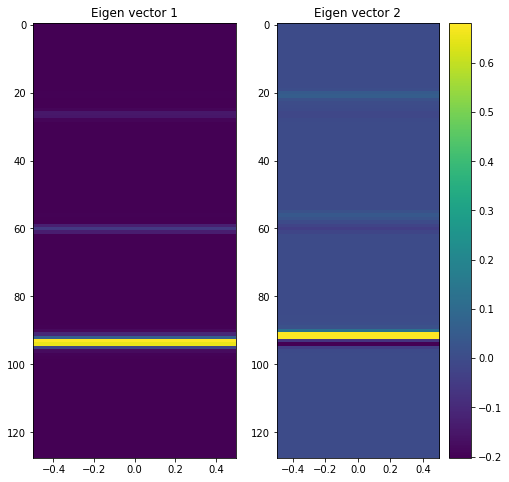

In [225]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.reshape(eigen_vectors[i-1][:],(128,1)),aspect='auto')
    plt.title('Eigen vector %g'%i)

plt.colorbar()
plt.show()

From the plot above we can see that the eigen vectors are perpendicular- agrees with the result of the dot-product.

P4-3) 

a) Compute the temporal activation matrix.

input_data_matrix=(eigen_vectors).(activation_matrix)

So, activation_matrix=(eigen_vectors.T).(input_data_matrix)

In [189]:
activation_matrix=eigen_vectors.dot(flute_samples)
activation_matrix

array([[ 4.89274298e-16,  4.89274298e-16,  1.95815293e-06,
         1.21824251e-03,  1.11467279e-02,  4.25457188e-02,
         1.08820701e-01,  2.18229979e-01,  3.64828223e-01,
         5.35518873e-01,  7.22813733e-01,  9.28320969e-01,
         1.16226563e+00,  1.43146099e+00,  1.74536173e+00,
         2.11356685e+00,  2.54205880e+00,  3.03348673e+00,
         3.57930064e+00,  4.18783228e+00,  4.87551621e+00,
         5.63546609e+00,  6.46492526e+00,  7.37698962e+00,
         8.36472910e+00,  9.42933232e+00,  1.05720537e+01,
         1.17805838e+01,  1.30371694e+01,  1.43756969e+01,
         1.57972583e+01,  1.73247100e+01,  1.89896468e+01,
         2.07854817e+01,  2.27575475e+01,  2.48794533e+01,
         2.71190111e+01,  2.94583020e+01,  3.18828120e+01,
         3.43553679e+01,  3.68780896e+01,  3.95114619e+01,
         4.22981162e+01,  4.51913712e+01,  4.82738578e+01,
         5.15148171e+01,  5.48878702e+01,  5.83520792e+01,
         6.19920317e+01,  6.57046031e+01,  6.95165798e+0

In [190]:
activation_matrix.shape

(2, 143)

b) Plot the activation matrix.

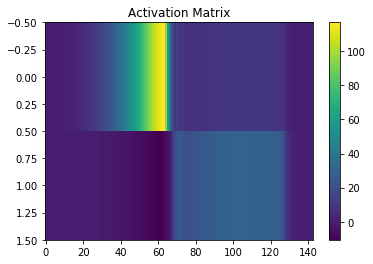

In [201]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(activation_matrix,aspect='auto');
plt.colorbar();
plt.title('Activation Matrix');

# P4- 4) 

a) Recover each source separately from the input data matrix. Since, each eigen vector corresponds to each musical note, and the activation matrix represents the temporal activation of each note, through SVD, we can separate the musical note separately.

first_musical_note=v1.s1.u1.T= effect of the first eigen vector in the input data matrix.

second_musical_note=v2.s2.u2.T= effect of the second eigen vector in the input data matrix.


Since, we have already calculated the effect of first singular vector above, we just have to plot it.

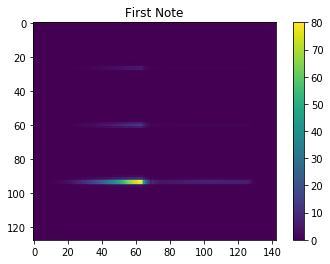

In [205]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(effect_f_singular_vector);
plt.colorbar();
plt.title('First Note');

Calculate the effect of second eigen vector using SVD.

First compute the second singular value, then the second right singular vector.

In [220]:
second_r_sing_vector=(data_dup.T).dot(second_eigen_vector)/second_singular_value
print(second_r_sing_vector.shape)
second_r_sing_vector

(143, 1)


array([[ 1.40446979e-18],
       [ 1.40446979e-18],
       [ 5.71152747e-09],
       [ 2.32036376e-06],
       [ 7.67539139e-06],
       [ 7.62071904e-06],
       [-5.52597293e-06],
       [-4.33347310e-05],
       [-1.09251158e-04],
       [-1.93976221e-04],
       [-2.84821315e-04],
       [-3.73392985e-04],
       [-4.58952585e-04],
       [-5.56325111e-04],
       [-6.61820437e-04],
       [-7.88459117e-04],
       [-9.53548423e-04],
       [-1.14275483e-03],
       [-1.36825875e-03],
       [-1.63910741e-03],
       [-1.94504164e-03],
       [-2.29054339e-03],
       [-2.65694098e-03],
       [-3.01941150e-03],
       [-3.38878750e-03],
       [-3.74465411e-03],
       [-4.11313769e-03],
       [-4.50342332e-03],
       [-4.94788507e-03],
       [-5.45073772e-03],
       [-6.00506570e-03],
       [-6.49602903e-03],
       [-6.92892821e-03],
       [-7.49865315e-03],
       [-8.19585951e-03],
       [-8.90663224e-03],
       [-9.60030937e-03],
       [-1.02191992e-02],
       [-1.0

In [221]:
effect_s_singular_vector=(second_eigen_vector.dot(second_r_sing_vector.T)).dot(second_singular_value)
effect_s_singular_vector.shape


(128, 143)

In [222]:
effect_s_singular_vector

array([[4.28862491e-20, 4.28862491e-20, 1.74404598e-10, ...,
        2.28833252e-06, 4.45721440e-07, 1.90861354e-09],
       [6.02981434e-20, 6.02981434e-20, 2.45213179e-10, ...,
        3.21739964e-06, 6.26685148e-07, 2.68351408e-09],
       [3.73166873e-20, 3.73166873e-20, 1.51754979e-10, ...,
        1.99115080e-06, 3.87836380e-07, 1.66074526e-09],
       ...,
       [3.37407351e-21, 3.37407351e-21, 1.37212731e-11, ...,
        1.80034447e-07, 3.50671122e-08, 1.50160076e-10],
       [1.05962137e-20, 1.05962137e-20, 4.30913971e-11, ...,
        5.65394758e-07, 1.10127599e-07, 4.71574862e-10],
       [2.12028157e-20, 2.12028157e-20, 8.62250402e-11, ...,
        1.13134382e-06, 2.20363165e-07, 9.43612046e-10]])

Plot the effect of second eigen vector.

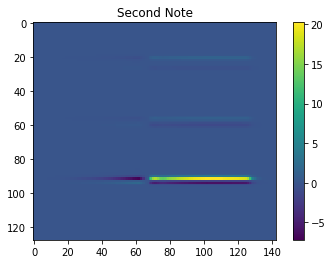

In [223]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(effect_s_singular_vector);
plt.colorbar();
plt.title('Second Note');

# Recovery without SVD-

Let's first isolate the activation of the first note from the activation matrix.

We know that the first and second eigen vectors represent the variations in each of the musical notes, and the activation matrix represents the temporal activations of these notes.

By project the the transpose of the first eigen vector on the input data matrix, we can isolate the activation of the first note.

In [228]:
first_eigen_activation=(first_eigen_vector.T).dot(flute_samples)

In [229]:
first_eigen_activation.shape

(1, 143)

Now if we compute the dot product of the first eigen vector and its activation, we can isolate the first note.

In [232]:
first_note=first_eigen_vector.dot(first_eigen_activation)
first_note.shape

(128, 143)

Text(0.5, 1.0, 'First note')

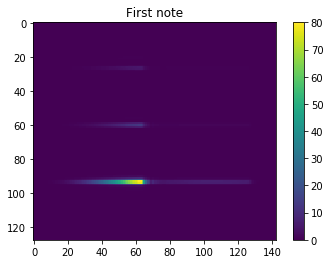

In [238]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(first_note);
plt.colorbar();
plt.title('First note')

Similarly lets compute or isolate the activations of the second eigen vector or second musical note by projecting the transpose of second eigen vector on the input data.

In [234]:
second_eigen_activation=(second_eigen_vector.T).dot(flute_samples)
second_eigen_activation.shape

(1, 143)

Now if we compute the dot product of the second eigen vector and its activation, we can isolate the second note.

In [235]:
second_note=second_eigen_vector.dot(second_eigen_activation)
second_note.shape

(128, 143)

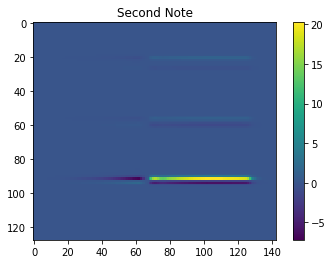

In [239]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(second_note);
plt.colorbar();
plt.title('Second Note');

# Conclusion:

Both the approaches have yeilded the same result as analytically both are same.

From SVD, 
First_note=V1.s1.U1

Second_note=V2.s2.U2

Without SVD, using projections-

X=(v1,v2)(a1.T,a2.T)

v1.T * X= a1.T

Similarly,

v2.T * X=a2.T


First note=v1.a1.T
Second note=v2.a2.T

Since, v1 and v2 are orthognal eigen vectors the activation matrix also contains orthognal eigen vectors. So, a1.T=s1.U1, a2.T=s2.U2.

Hence, we got the same result in both the methods.